In [7]:
(* import and parse the file containing our equations *)
system =Flatten[ToExpression[StringSplit[Import["cleaned.txt", "List"], "\n"]]];

In [11]:
(* the demensions of the system *)
dimensions = {x1, x2, x3, x4, x5, x6, x7, x8, x9, x10, x11, x12, x13, x14, x15, x16, x17, x18, x19, x20, x21};

In [15]:
(* coefficents of the system *)
{B, A} = CoefficientArrays[system, dimensions];

Basic solution with solve

{{x1 -> 0.834403, x2 -> 0.278551, x3 -> 0.750225, x4 -> -0.877223, x5 -> -0.67107, 
 
>    x6 -> 1.63143, x7 -> -0.151417, x8 -> -0.122025, x9 -> -0.885059, x10 -> 0.652412, 
 
>    x11 -> -0.788524, x12 -> -1.31481, x13 -> -2.04559, x14 -> -0.428833, 
 
>    x15 -> -1.51564, x16 -> 0.452994, x17 -> 0.293732, x18 -> -0.711651, 
 
>    x19 -> -0.894227, x20 -> 0.222595, x21 -> 1.37145}}
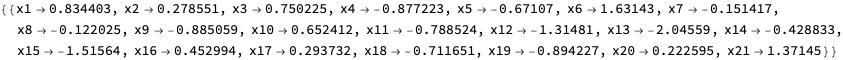

In [17]:
solveSolutions = Solve[system, dimensions]

{{x1 -> 0.834403, x2 -> 0.278551, x3 -> 0.750225, x4 -> -0.877223, x5 -> -0.67107, 
 
>    x6 -> 1.63143, x7 -> -0.151417, x8 -> -0.122025, x9 -> -0.885059, x10 -> 0.652412, 
 
>    x11 -> -0.788524, x12 -> -1.31481, x13 -> -2.04559, x14 -> -0.428833, 
 
>    x15 -> -1.51564, x16 -> 0.452994, x17 -> 0.293732, x18 -> -0.711651, 
 
>    x19 -> -0.894227, x20 -> 0.222595, x21 -> 1.37145}}
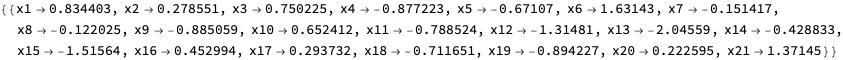

In [18]:
(*    is nsolve the same as linear solve ? *)
nsolveSolutions = NSolve[system, dimensions]

Solution by matrix equation Ax=B using linearSolve  

In [20]:
linearSolutions = LinearSolve[A, -B]

{0.834403, 0.278551, 0.750225, -0.877223, -0.67107, 1.63143, -0.151417, -0.122025, 
 
>   -0.885059, 0.652412, -0.788524, -1.31481, -2.04559, -0.428833, -1.51564, 0.452994, 
 
>   0.293732, -0.711651, -0.894227, 0.222595, 1.37145}

Solution using row reduce of agumented matrix

In [40]:
(*    build the augmented matrix *)
augmented=Transpose[Append[Transpose[A],-B]];

In [25]:
(*    row reduce the augmented matrix to find the inverse *)
reducedSolution =RowReduce[augmented];

In [27]:
(*    take the last column *)
reducedSolution[[All,22]]

{0.834403, 0.278551, 0.750225, -0.877223, -0.67107, 1.63143, -0.151417, -0.122025, 
 
>   -0.885059, 0.652412, -0.788524, -1.31481, -2.04559, -0.428833, -1.51564, 0.452994, 
 
>   0.293732, -0.711651, -0.894227, 0.222595, 1.37145}

Solution using inverse   

In [37]:
inverseSolution =Inverse[A].-B

ToExpression::sntx: Invalid syntax in or before "inverseSolution =Inverse[A].-B".
                                                          ^

$Failed

Solution using craimers rule    

In [37]:
(*    craimers rule module from rosettacode.com *)
crule[m_,b_]:=Module[
    {d=Det[m],a},
    Table[
        a=m;
        a[[All,k]]=b;
        Det[a]/d,
        {k,Length[m]}
    ]
]

In [39]:
crule[A, -B]

{0.834403, 0.278551, 0.750225, -0.877223, -0.67107, 1.63143, -0.151417, -0.122025, 
 
>   -0.885059, 0.652412, -0.788524, -1.31481, -2.04559, -0.428833, -1.51564, 0.452994, 
 
>   0.293732, -0.711651, -0.894227, 0.222595, 1.37145}